1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

In [1]:
#libraries
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###### 1. Data cleaning including missing values, outliers and multi-collinearity.

In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values outliers and multicollinearity will be handled after identifying which variables are important.

###### 2. Describe your fraud detection model in elaboration.

In my fraud detection model I am going to include all the variables where it is related to transaction the time , transaction type , amount , my target would be fraud  as given in the description. I would apply various algorithm and see which is the best for for the problem . This is how I am thinking of to solve the Problem right now after further analysis I'll answer this question again in the upcoming steps. 

###### 3. How did you select variables to be included in the model?

Initially I am selecting the variables on pure experience 

1-Steps should be included because it denotes at which time the transactions happen

2-Type should be include because the most fraudulent transactions are of cashing out

3-Amount it tells the transaction amount

4-oldbalanceOrg it necessary to know the balance before transaction

5-newbalanceOrig it is necessary to know the balance after transaction

6-oldbalanceDest it is important to know the intended transaction before its taking place

7-newbalanceDest it is important to know the intended transaction after its taking place

8-isFraud This variable is my target variable

* I am purpousefully omitting this variable isFlaggedFraud because it consideres only transaction above 200 as fraud where as person who is doing a fraud can commit the fraud of 199 20 to 30 times and not be detected by it in this variable so i ommiting this variable 

In [4]:
data1=data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
data1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [6]:
data1['type'].replace({'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4},inplace=True)
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,1
3,1,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [7]:
data1.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

# Outliers Detection 

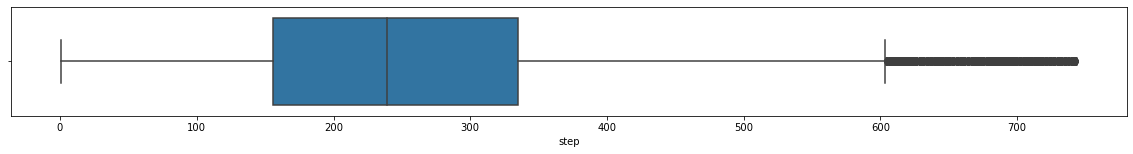

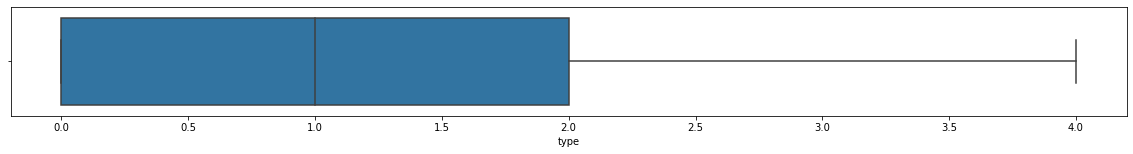

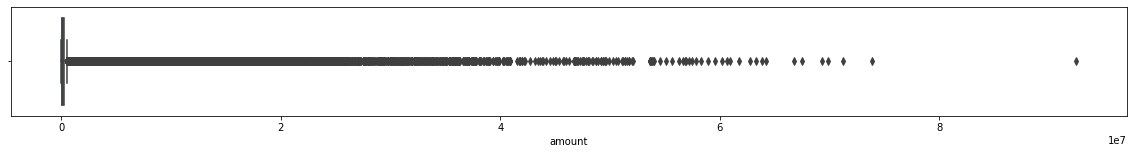

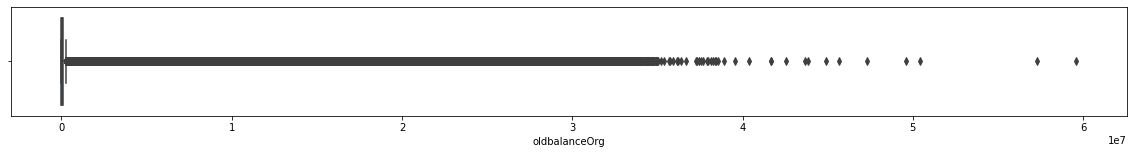

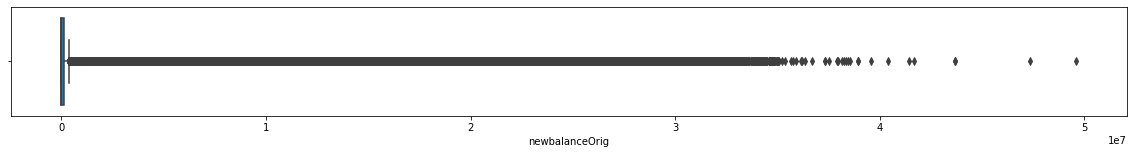

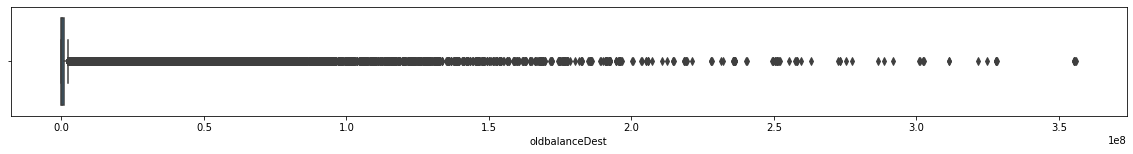

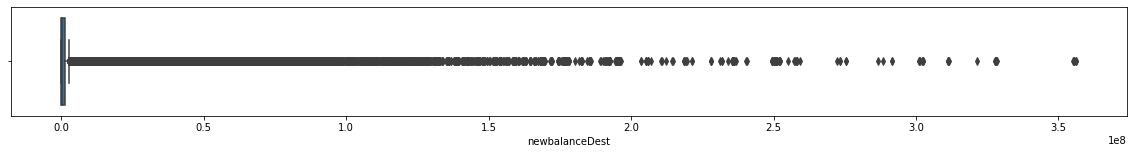

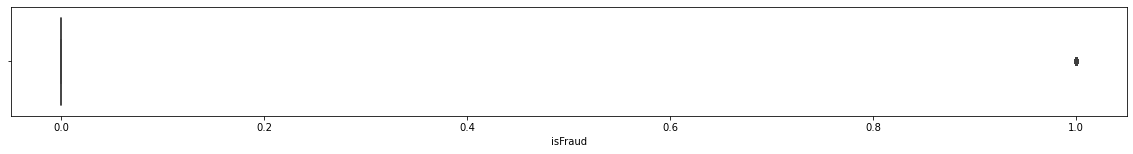

In [8]:
plt.rcParams['figure.figsize']=(20,2)
for i in data1.columns:
    sns.boxplot(data1[i])
    plt.show()

There are many outliers in amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalancedest so removing the outliers by iqr method

In [9]:
data2=data1.drop('isFraud',axis=1)
data2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,3,181.00,181.0,0.00,0.0,0.0
3,1,0,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [10]:
Q1 = data2.quantile(0.25)

# obtain the third quartile
Q3 = data2.quantile(0.75)

# obtain the IQR
IQR = Q3-Q1

In [11]:
dt_c = data2[~((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
dt_c.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,3,181.00,181.0,0.00,0.0,0.0
3,1,0,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


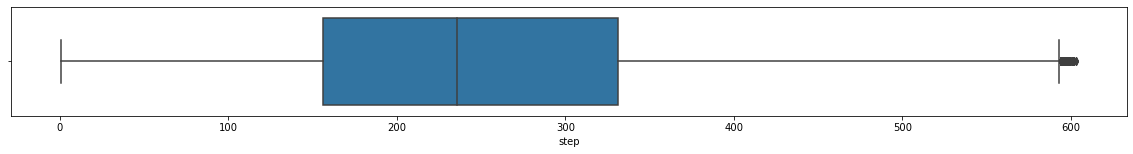

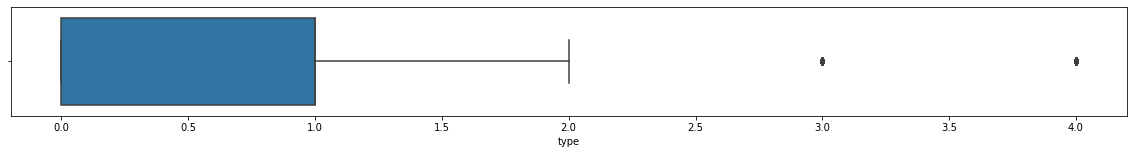

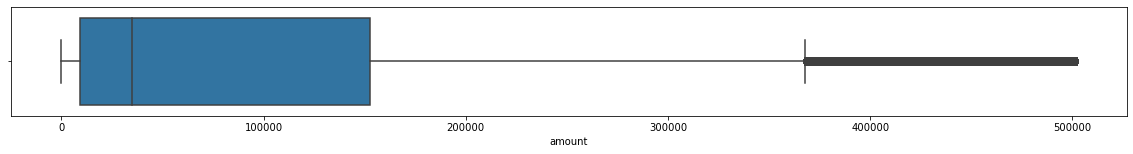

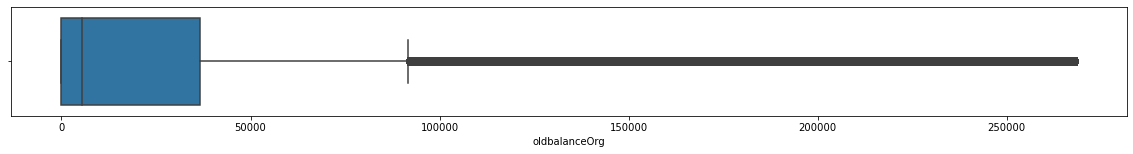

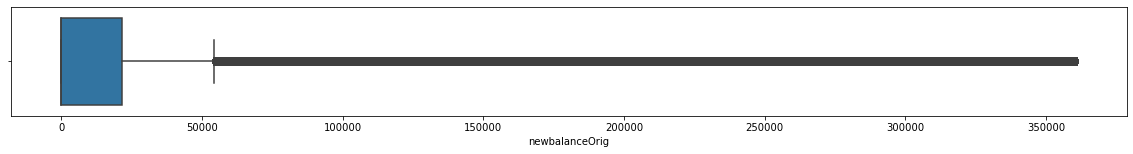

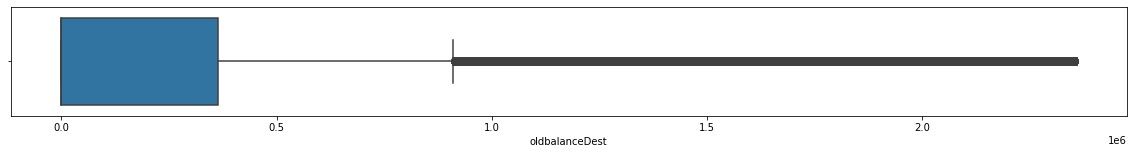

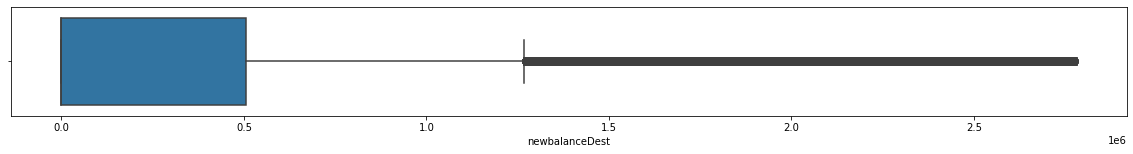

In [13]:
plt.rcParams['figure.figsize']=(20,2)
for i in dt_c.columns:
    sns.boxplot(dt_c[i])
    plt.show()

In [14]:
dt_c['isFraud']=data1['isFraud']
dt_c.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,1
3,1,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


# Balancing of the dataset 

<AxesSubplot:ylabel='isFraud'>

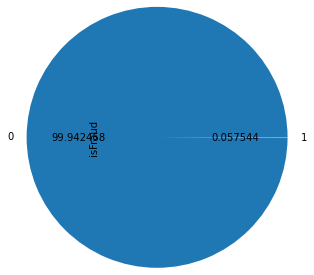

In [15]:
a=dt_c['isFraud'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=3)

The dataset is biased toward 0 so I will apply SMOTE to balance the dataset

In [16]:
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(dt_c.drop('isFraud',axis=1), dt_c['isFraud'])

In [17]:
data3 = pd.DataFrame(X, columns = dt_c.drop('isFraud',axis=1).columns )
data3['isFraud'] = y

<AxesSubplot:ylabel='isFraud'>

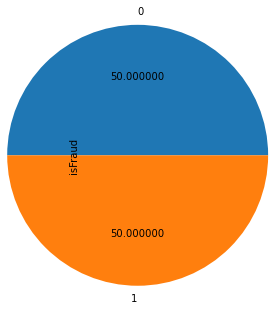

In [18]:
a=data3['isFraud'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=3)

# MultiCollinearity

<AxesSubplot:>

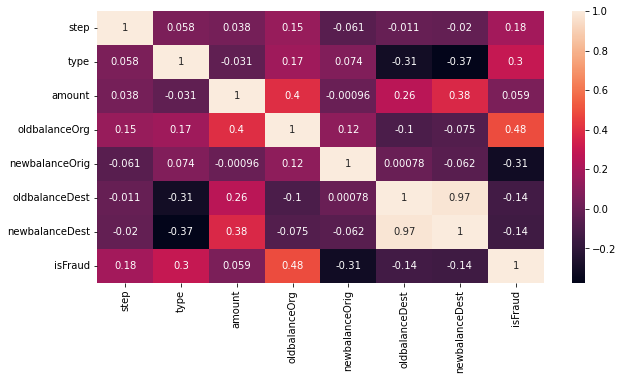

In [19]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(data3.corr(),annot=True)

Since oldbalanceDest is higly correlated with newbalanceDest we will drop oldbalanceDest

In [20]:
data4=data3.drop('oldbalanceDest',axis=1)
data4.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0
2,1,3,181.00,181.0,0.00,0.0,1
3,1,0,181.00,181.0,0.00,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0


<AxesSubplot:>

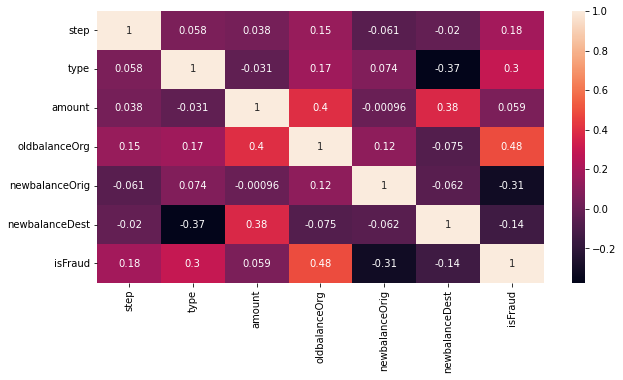

In [21]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(data4.corr(),annot=True)

# Scale

In [22]:
X_s=data4.drop('isFraud',axis=1)
X_s.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0
1,1,1,1864.28,21249.0,19384.72,0.0
2,1,3,181.00,181.0,0.00,0.0
3,1,0,181.00,181.0,0.00,0.0
4,1,1,11668.14,41554.0,29885.86,0.0


In [23]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(X_s)
df_num_scaled = pd.DataFrame(num_scaled, columns = X_s.columns)
df_num_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest
0,-1.847251,-0.149597,-0.925444,1.374850,2.840368,-0.564921
1,-1.847251,-0.149597,-1.008097,-0.614123,0.066871,-0.564921
2,-1.847251,1.425781,-1.025542,-0.895570,-0.314669,-0.564921
3,-1.847251,-0.937286,-1.025542,-0.895570,-0.314669,-0.564921
4,-1.847251,-0.149597,-0.906494,-0.342870,0.273560,-0.564921


In [24]:
main=pd.concat((df_num_scaled,data4['isFraud']),axis=1)
main.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
0,-1.847251,-0.149597,-0.925444,1.374850,2.840368,-0.564921,0
1,-1.847251,-0.149597,-1.008097,-0.614123,0.066871,-0.564921,0
2,-1.847251,1.425781,-1.025542,-0.895570,-0.314669,-0.564921,1
3,-1.847251,-0.937286,-1.025542,-0.895570,-0.314669,-0.564921,1
4,-1.847251,-0.149597,-0.906494,-0.342870,0.273560,-0.564921,0


Data is cleaned outliers is removed , balanced and multicollinearity is handled 

###### 4. Demonstrate the performance of the model by using best set of tools.

# K Nearest Neighbours Model

In [25]:
dt_1=main.copy()
df_target = dt_1['isFraud']
df_feature = dt_1.drop('isFraud', axis = 1)

In [26]:
X = sm.add_constant(df_feature)
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

<IPython.core.display.Javascript object>

X_train (6911049, 7)
y_train (6911049,)
X_test (1727763, 7)
y_test (1727763,)


In [27]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric='chebyshev')

knn_model = knn_classification.fit(X_train, y_train)

In [28]:
y_pred_prob = knn_model.predict(X_train)

y_pred_prob[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [29]:
cm=confusion_matrix(y_train,y_pred_prob)
a=pd.DataFrame(data=cm,columns=['Pred:0','Pred:1'],index=['Actual:0','Actual:1'])
a

,Pred:0,Pred:1
Actual:0,3455259,0
Actual:1,0,3455790


In [30]:
print(classification_report(y_train,y_pred_prob))
print('Train report')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3455259
           1       1.00      1.00      1.00   3455790

    accuracy                           1.00   6911049
   macro avg       1.00      1.00      1.00   6911049
weighted avg       1.00      1.00      1.00   6911049

Train report


AUC 1.0


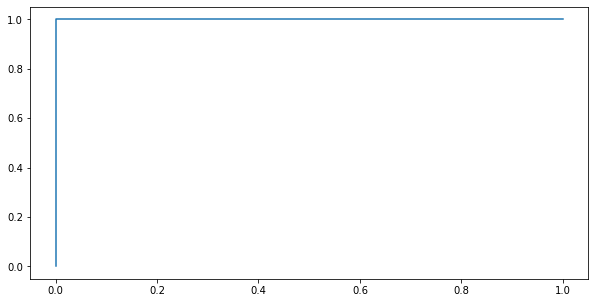

In [31]:
fpr,tpr,threshold=roc_curve(y_train,y_pred_prob)
plt.plot(fpr,tpr)
print('AUC',roc_auc_score(y_train,y_pred_prob))

In [32]:
y_pred_prob = knn_model.predict(X_test)

y_pred_prob[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [33]:
cm=confusion_matrix(y_test,y_pred_prob)
a=pd.DataFrame(data=cm,columns=['Pred:0','Pred:1'],index=['Actual:0','Actual:1'])
a

,Pred:0,Pred:1
Actual:0,861362,2785
Actual:1,133,863483


In [34]:
print(classification_report(y_test,y_pred_prob))
print('Test report')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    864147
           1       1.00      1.00      1.00    863616

    accuracy                           1.00   1727763
   macro avg       1.00      1.00      1.00   1727763
weighted avg       1.00      1.00      1.00   1727763

Test report


AUC 0.9983115825340317


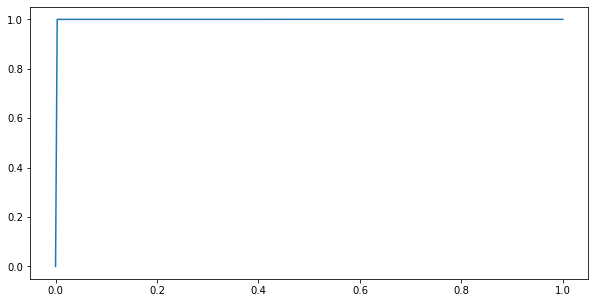

In [35]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
print('AUC',roc_auc_score(y_test,y_pred_prob))

###### 5. What are the key factors that predict fraudulent customer?

In [36]:
ada_model = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 99,random_state=10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=99, random_state=10)

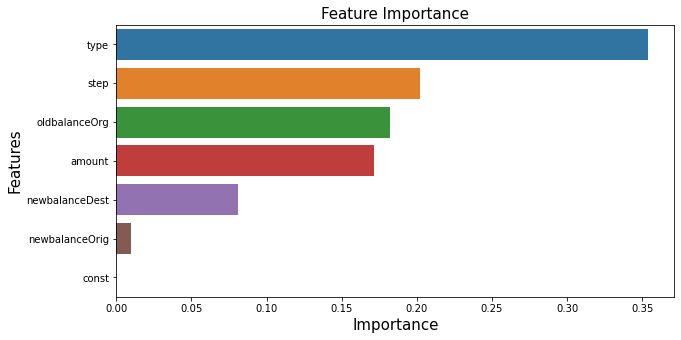

In [37]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': ada_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

The key Factors to predict Fraudulent customers are Type,step,oldbalanceOrg,amount,newbalanceOrig out of that Type is the most important  

###### 6. Do these factors make sense? If yes, How? If not, How not?

In [38]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


I'll answer this with consideration to the main dataframe

1) step-It is important since it denotes the time of transaction 

2) type-It is important since it tells what was the type of transaction

3) amount-It is important to know the amount of transaction which was meant to be transfered 

4) nameOrig - It is not important since the transaction can take place from any account 

5) oldbalanceOrig - It is important to know the account balance before the transaction 

6) newbalanceOrig - It is important to know the new balance after the transaction so that to know if it is processed or not from the account 

7) nameDest - It is no important since it can be any account 

8) oldBalanceDest - It is not important since it high collinearity with newbalanceDest

9) newBalanceDest - It is important to know if the transaction has taken place or not 

10) iFraud -It is important since it the target variable of the model

11) isFlaggedFraud - I is not important since it has a condition that only transaction amount of 200 and above can be considered as a fraud 

###### 7. What kind of prevention should be adopted while company update its infrastructure?

Since for fraudulent transaction the transaction type is cashout we can install cameras on atms and there should be any condition for a flagging a transaction Fraud since any transaction can be fraud 

###### 8. Assuming these actions have been implemented, how would you determine if they work?

After taking the necessary actions we can determine if they work by creating a truth table 